In [90]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy.linalg as alg
import pandas as pd

class LinRegression:
    def __init__(self,x,y):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=422)
        self.l, self.bazis, self.features, self.w, self.q = 0, None, None, None, None
    
    def set_bazis(self, bazis):
        self.bazis = bazis
    
    def set_features(self,features):
        self.features = features

    def set_l(self,l):
        self.l = l
        
    def apply_features(self,x):
        return x if self.features is None else self.features(x)
    
    def get_matrq(self):
        if self.q is not None:
            return self.q
        features = self.apply_features(self.x_train)
        bazis = np.array([lambda x,i=i:x[i] for i in range(features.shape[1])]) if self.bazis is None else self.bazis
        self.q = np.array([[f(x) for f in bazis] for x in features])
        return self.q
    
    def get_w(self):
        if self.w is not None:
            return self.w
        q = self.get_matrq()
        self.w =  np.dot(np.dot(alg.inv(np.dot(q.transpose(),q) + np.diag([self.l] * q.shape[1])),q.transpose()),self.y_train)
        return self.w

    def apply_weights(self,x):
        w = self.get_w() if self.w is None else self.w
        features = self.apply_features(x)
        return np.array([np.dot(i,w) for i in features])
    
    def get_accuracy(self,x=None,y=None):
        fx=self.apply_weights(self.x_test if x is None else x)
        y_acc =self.y_test if y is None else y
        r2 = 1-(np.dot(y_acc - fx,y_acc - fx)) / (np.dot(y_acc - np.mean(y_acc),y_acc - np.mean(y_acc)))
        return r2 if r2 >0 else 0
    
    def clear(self):
        self.w,features,self.bazis = None, None, None
        
    def get_mistake(self,w = None,l = None):
        w = self.w if w is None else w
        l = self.l if l is None else l
        q = self.get_matrq()
        yi = np.dot(q,w)
        return (np.dot(yi - self.y_train,(yi - self.y_train).T)) / q.shape[0] + l*np.dot(w,w.T)
        
    
    def validate(self,features: list,show=False):
        self.clear()
        train,test = list(), list()
        for feature in features:
            self.clear()
            self.set_features(feature)
            train.append(self.get_accuracy(self.x_train,self.y_train))
            test.append(self.get_accuracy())
        if show:
            plt.plot(train,'r-o')
            plt.plot(test,'b-o')
            plt.legend(['Train', 'Test'])
            plt.show()

        return train,test
            
            
        
        

task1

D:\programs\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.95145e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


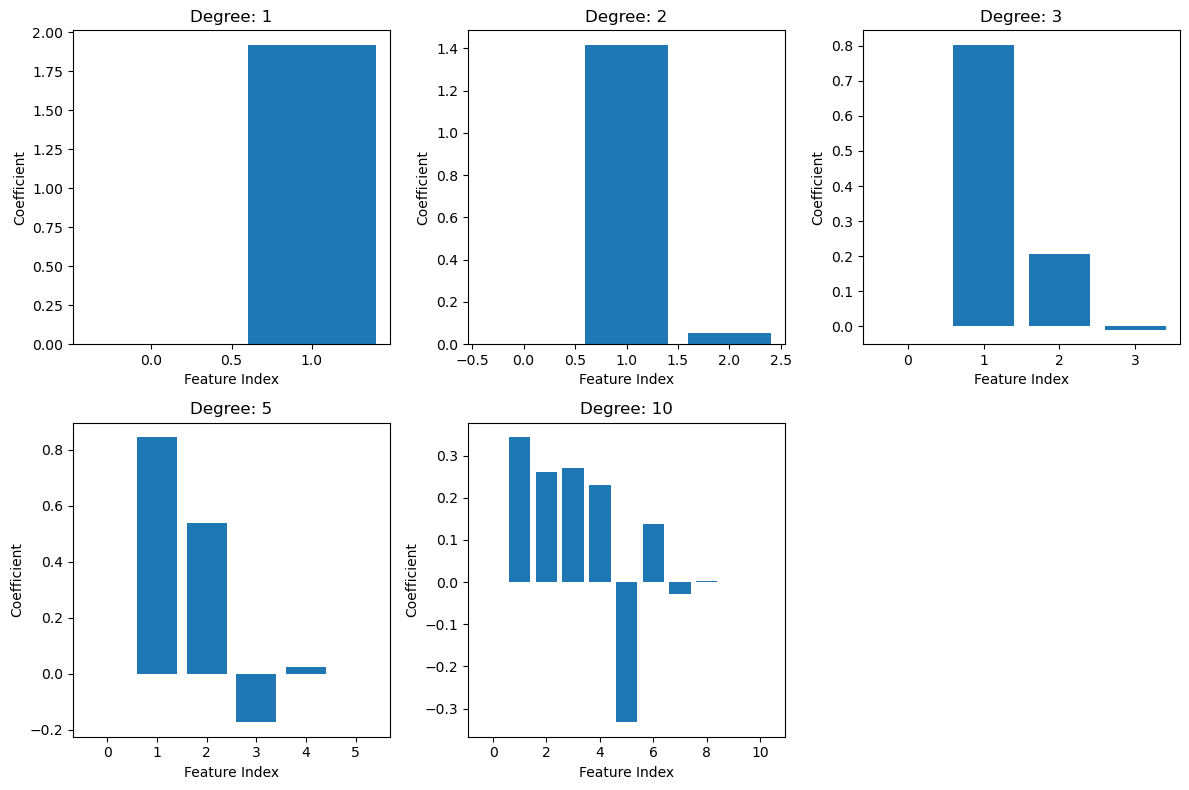

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X[:, 0] + 5 + np.random.randn(100) * 2  

degrees = [1, 2, 3, 5, 10]
alpha = 1.0

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    plt.subplot(2, 3, i + 1)
    plt.bar(range(len(ridge.coef_)), ridge.coef_)
    plt.title(f'Degree: {degree}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()


D:\programs\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.667e+01, tolerance: 2.772e-01
  model = cd_fast.enet_coordinate_descent(
D:\programs\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+02, tolerance: 2.772e-01
  model = cd_fast.enet_coordinate_descent(


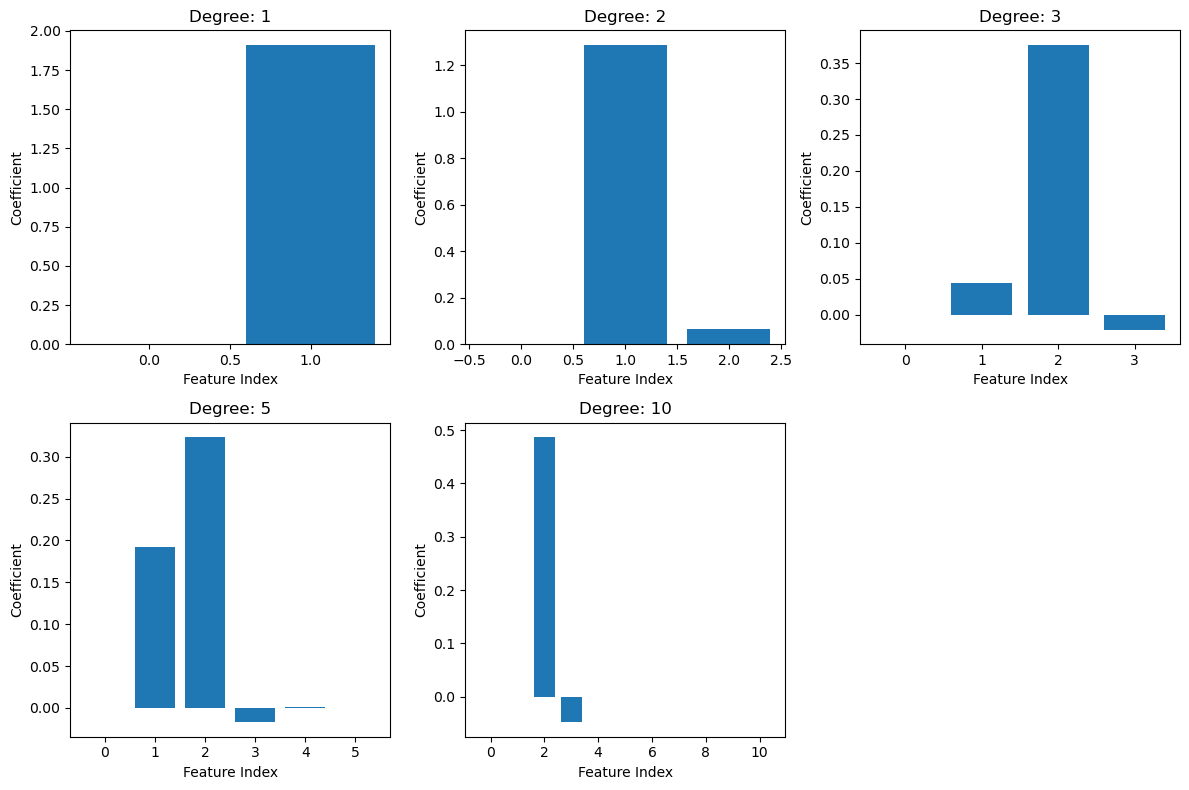

In [3]:
from sklearn.linear_model import Lasso

alpha = 0.1

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(2, 3, i + 1)
    plt.bar(range(len(lasso.coef_)), lasso.coef_)
    plt.title(f'Degree: {degree}')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()


task2

In [4]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 100 * rng.rand(60)
y = x**2/10 + 0.9 * rng.randn(60)
x=x.reshape(-1,1)

In [5]:
rg =LinRegression(x,y)

In [6]:
rg.get_accuracy()

0.8578249080189124

In [7]:
features = [PolynomialFeatures(degree=i).fit_transform for i in range(2,9)]

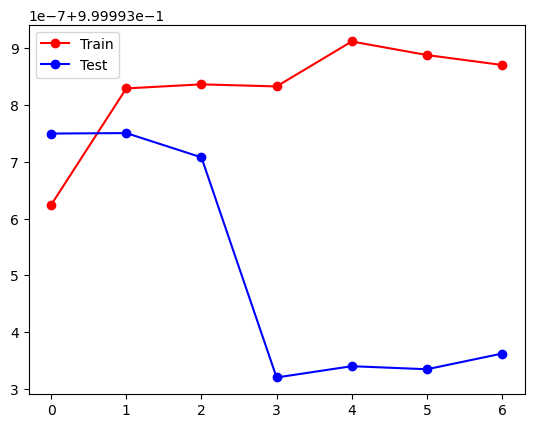

([0.9999936240455163,
  0.9999938292391155,
  0.99999383638148,
  0.9999938327394963,
  0.9999939119022013,
  0.9999938880336489,
  0.9999938705106718],
 [0.9999937497047094,
  0.9999937505488786,
  0.999993707801171,
  0.9999933200577271,
  0.9999933399363542,
  0.9999933345503605,
  0.9999933621470443])

In [8]:
rg.set_l(500)
rg.validate(features,show=True)

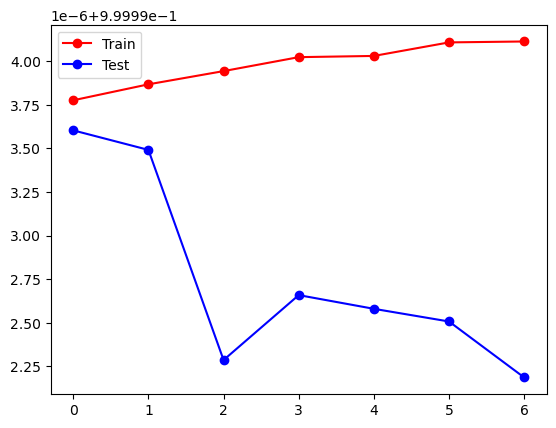

([0.9999937766354922,
  0.9999938682622287,
  0.9999939441766946,
  0.9999940243024208,
  0.999994031312717,
  0.9999941090545934,
  0.99999411433057],
 [0.9999936038062632,
  0.9999934916859667,
  0.9999922848024091,
  0.9999926577095786,
  0.999992578967913,
  0.9999925061710124,
  0.9999921846537821])

In [9]:
rg.set_l(0)
rg.validate(features,show=True)

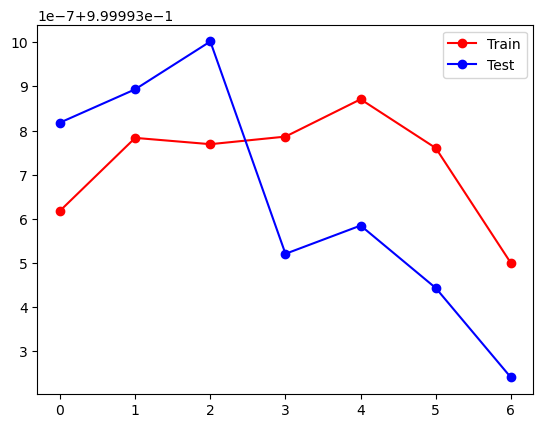

([0.9999936183467493,
  0.9999937833374998,
  0.9999937690855699,
  0.999993786257005,
  0.9999938707491545,
  0.9999937602813777,
  0.9999934998891012],
 [0.9999938179486966,
  0.9999938932706718,
  0.9999940015451979,
  0.9999935209655905,
  0.9999935849208926,
  0.9999934434899708,
  0.9999932410446206])

In [10]:
rg.set_l(1000)
rg.validate(features,show=True)

task 3

In [11]:
class GradientFlow:
    def __init__(self,x,y,features=None,l=0):
        self.features = features
        self.x =x
        self.featured = self.apply_features(x)
        self.w = 10*np.random.rand(self.featured.shape[1])
        self.y = y
        self.l=l
        
    def set_features(self,features):
        self.features = features
    
    def set_l(self,l):
        self.l = l

    def get_gradient(self):
        gradient = np.dot(self.featured.transpose(),(np.dot(self.featured,self.w) - self.y)) + self.l * self.w
        return gradient / np.linalg.norm(gradient)
    
    def apply_features(self,x):
        return x if self.features is None else self.features(x)
    
    def learn(self,epochs: int, speed=10):
        for _ in range(epochs):
            self.w -= speed*self.get_gradient()
            speed *= 0.99
            
    def apply_weights(self,x):
        return np.array([np.dot(i,self.w) for i in self.features(x)])

    def get_accuracy(self,x=None,y=None):
        fx=self.apply_weights(self.x if x is None else x)
        y_acc =self.y if y is None else y
        return 1-(np.dot(y_acc - fx,y_acc - fx)) / (np.dot(y_acc - np.mean(y_acc),y_acc - np.mean(y_acc)))
    

In [12]:
gr = GradientFlow(x,y,PolynomialFeatures(degree=3).fit_transform)

In [13]:
gr.learn(10000)
gr.get_accuracy()


-28.378812395915745

In [14]:
def show(x,y):
    plt.scatter(x,y)
    x_i = np.linspace(0,100,1000)
    
    plt.plot(x_i,gr.apply_weights(x_i.reshape(-1,1)),'r')
    plt.show()

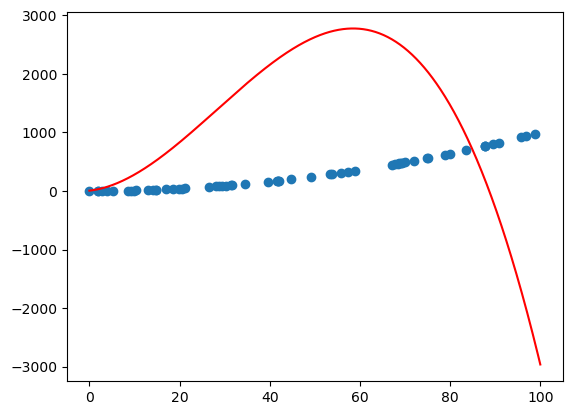

In [15]:
show(x,y)

task 4

In [16]:
dta=pd.read_csv("auto-mpg.csv")
dta = dta.replace('?', np.nan)
dta=dta.dropna()

In [17]:
y=dta.values[:,0]
x=dta.values[:,1:-2].astype(float)

In [18]:
reg=LinRegression(x,y)
reg.set_features(PolynomialFeatures(degree=2).fit_transform)
reg.set_l(10)

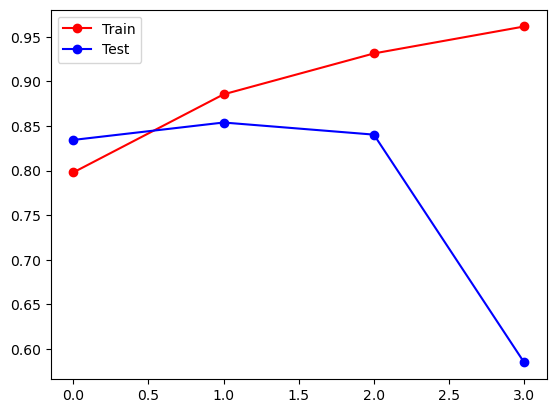

([0.79790128453665, 0.8855050181273073, 0.9313984007702686, 0.961640679827334],
 [0.834369391727567,
  0.8539095756647798,
  0.8403290836341073,
  0.5847249097445306])

In [19]:
reg.validate([PolynomialFeatures(degree=i).fit_transform for i in range(1,5)],show=True)

In [20]:
dta = pd.read_csv("HousingData.csv").dropna()

In [21]:
[len(set(dta.values[:,i])) for i in range(14)]

[393, 25, 73, 2, 78, 355, 293, 336, 9, 64, 46, 272, 364, 205]

In [22]:
y = dta.values[:,-1]
x = dta.drop(columns=["CHAS","RAD","MEDV"]).values

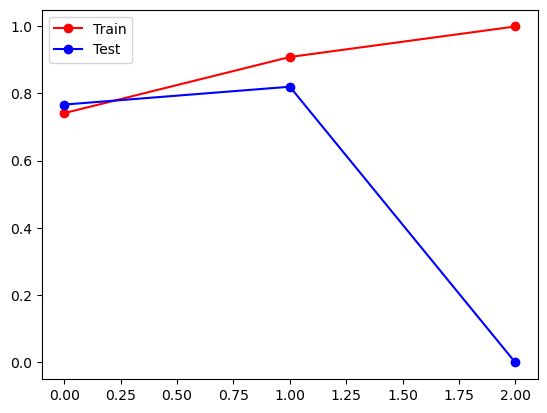

([0.7410406843044484, 0.9077149467529665, 0.9984072240164452],
 [0.7663566859605251, 0.8194112349482725, 0])

In [23]:
reg = LinRegression(x,y)
reg.set_l(0.1)
reg.validate([PolynomialFeatures(degree=i).fit_transform for i in range(1,4)],show=True)

task5

In [335]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = np.linspace(0,10,100)
y = 2*x + rng.randn(100)
x=x.reshape(-1,1)

In [336]:
reg = LinRegression(x,y)
reg.set_features(PolynomialFeatures(degree=1).fit_transform)
reg.set_l(10)

In [337]:
reg.get_w()

array([-0.0519016 ,  2.01870213])

In [338]:
reg.get_accuracy()

0.9702508208208602

In [339]:
reg.get_mistake(np.array([2,3]),2)

85.69112381049575

In [340]:
reg.get_mistake()

41.52718027547178

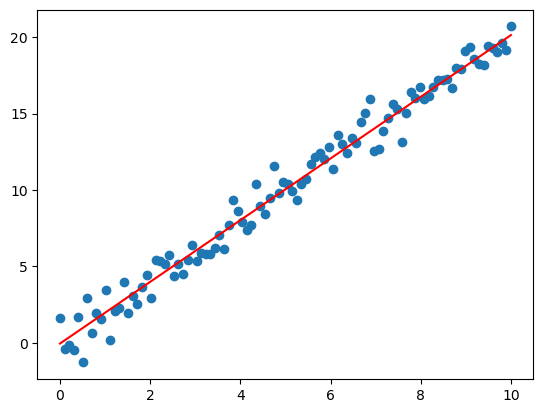

In [341]:
plt.scatter(x,y)
x_i = np.linspace(0,10,1000)

plt.plot(x_i,reg.apply_weights(x_i.reshape(-1,1)),'r')
plt.show()

In [228]:
reg.get_mistake(np.array([0,0]))

160978.2118206741

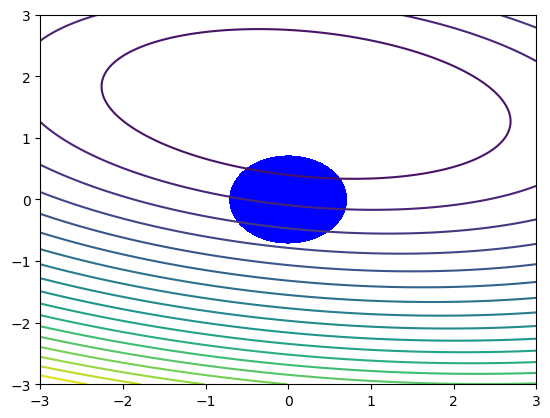

In [368]:
import numpy as np
import matplotlib.pyplot as plt


def function_wrapper(x, y):
    return reg.get_mistake(np.array([x,y]))

def f(x, y):
    return x**2 + y**2


x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)


Z = np.array([[function_wrapper(x, y) for x,y in zip(xl, yl)] for xl, yl in zip(X, Y)])


levels = np.linspace(Z.min(), Z.max(), 20)

plt.contour(X, Y, Z, levels=levels)



Z = f(X, Y)
plt.contourf(X, Y,Z,levels = [0,0.5] ,colors='Blue')

plt.show()
